# Atelier 2 - Mesures de similarité et dissimilarité (Mall_Customers)

Forme initiale: (200, 5)
Premières lignes (avant conversion) :


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dernières lignes (avant conversion) :


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Aperçu après conversion k$ -> $ :


,CustomerID,Age,Annual Income (k$),Annual Income ($),Spending Score (1-100)
0,1,19,15,15000,39
1,2,21,15,15000,81
2,3,20,16,16000,6
3,4,23,16,16000,77
4,5,31,17,17000,40


,CustomerID,Age,Annual Income (k$),Annual Income ($),Spending Score (1-100)
195,196,35,120,120000,79
196,197,45,126,126000,28
197,198,32,126,126000,74
198,199,32,137,137000,18
199,200,30,137,137000,83


Shapes -> Euclidienne: (200, 200) | Manhattan: (200, 200)
Euclidienne[0:3,0:3]:
 [[   0.           42.04759208 1000.54485157]
 [  42.04759208    0.         1002.80905461]
 [1000.54485157 1002.80905461    0.        ]]
Manhattan[0:3,0:3]:
 [[   0.   44. 1034.]
 [  44.    0. 1076.]
 [1034. 1076.    0.]]


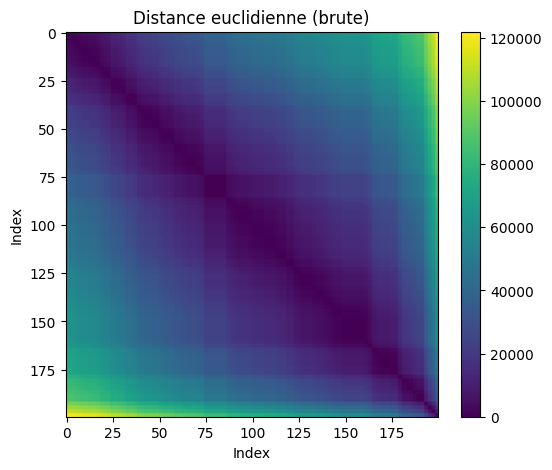

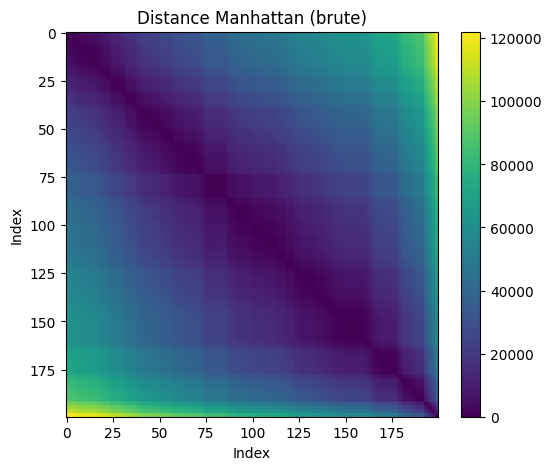

Euclidienne(normalisée)[0:3,0:3]:
 [[0.         0.43029381 0.33738296]
 [0.43029381 0.         0.76559158]
 [0.33738296 0.76559158 0.        ]]
Manhattan(normalisée)[0:3,0:3]:
 [[0.         0.46703297 0.36416218]
 [0.46703297 0.         0.79273361]
 [0.36416218 0.79273361 0.        ]]


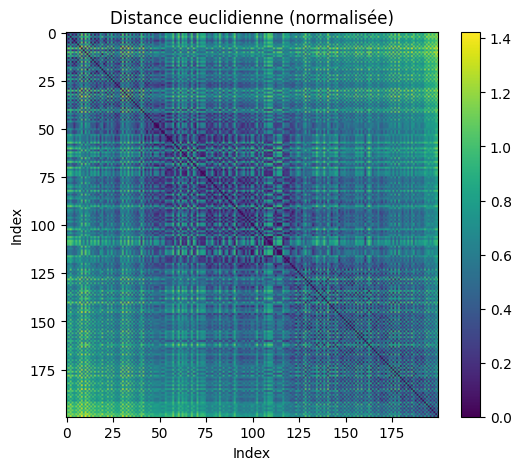

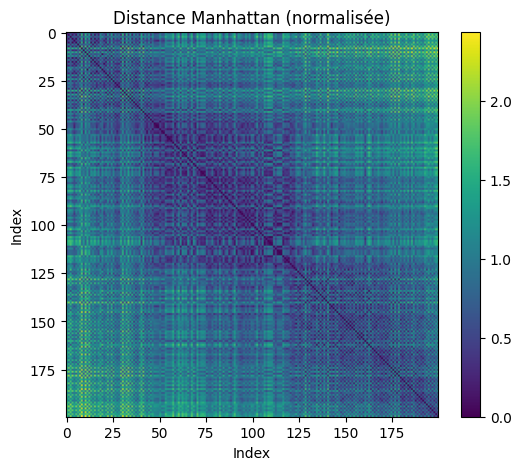

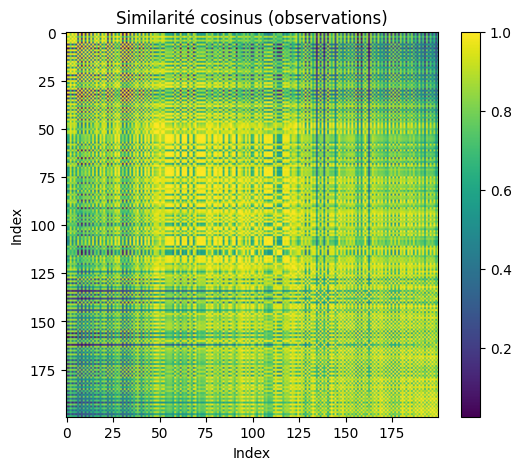

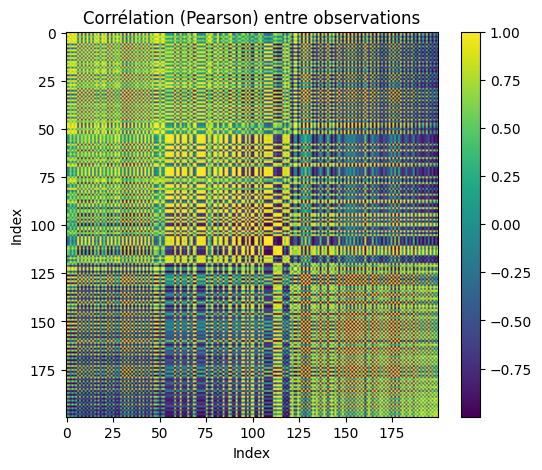

Corrélation (entre variables) :
                              Age  Annual Income ($)  Spending Score (1-100)
Age                     1.000000          -0.012398               -0.327227
Annual Income ($)      -0.012398           1.000000                0.009903
Spending Score (1-100) -0.327227           0.009903                1.000000


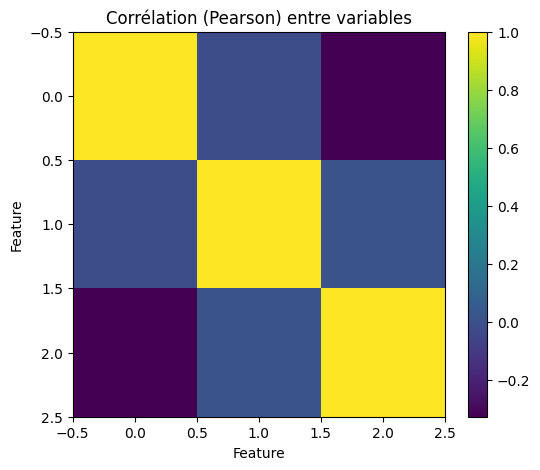

Spearman(Euclidienne_normalisée, 1 - Cosinus) : rho=0.834, p=0.000e+00


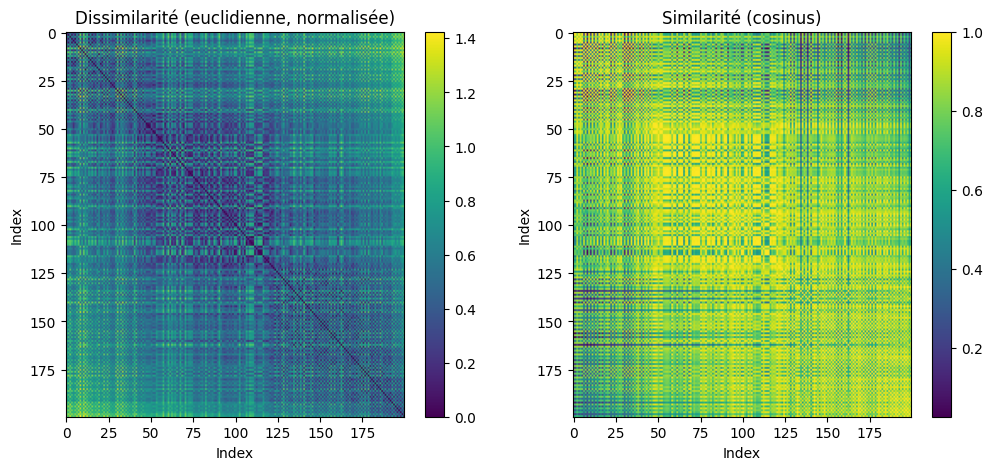


Conclusions :
- Distance vs Similarité : une distance = moins proche ; une similarité = plus proche.
- Normalisation : indispensable (unités différentes : années, dollars, score 1–100) ; sinon le revenu domine.
- Sensibilité aux extrêmes : Euclidienne (L2) > Manhattan (L1).
- Cosinus : pertinent quand l’orientation du profil (pattern relatif) compte plus que l’amplitude absolue.



In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
from scipy.stats import spearmanr
import matplotlib.pyplot as plt


# 1. Chargement du dataset

csv_path = Path('Mall_Customers.csv')
if not csv_path.exists():
    raise FileNotFoundError("Placez 'Mall_Customers.csv' dans le même dossier que ce notebook.")

data = pd.read_csv(csv_path)
print("Forme initiale:", data.shape)
print("Premières lignes (avant conversion) :")
display(data.head())
print("Dernières lignes (avant conversion) :")
display(data.tail())


# 2. Conversion k$ -> $ et affichage après conversion

data['Annual Income ($)'] = data['Annual Income (k$)'] * 1000

print("Aperçu après conversion k$ -> $ :")
cols_show = ['CustomerID', 'Age', 'Annual Income (k$)', 'Annual Income ($)', 'Spending Score (1-100)']
display(data[cols_show].head())
display(data[cols_show].tail())


# 3. Sélection des variables quantitatives (X de travail)

features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']
X = data[features].copy()


# 4. Dissimilarités sur données brutes

dist_euc = euclidean_distances(X)
dist_man = manhattan_distances(X)

print("Shapes -> Euclidienne:", dist_euc.shape, "| Manhattan:", dist_man.shape)
print("Euclidienne[0:3,0:3]:\n", dist_euc[:3, :3])
print("Manhattan[0:3,0:3]:\n", dist_man[:3, :3])

def show_heatmap(M, title, xlabel='Index', ylabel='Index'):
    plt.figure(figsize=(6,5))
    plt.imshow(M, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

show_heatmap(dist_euc, "Distance euclidienne (brute)")
show_heatmap(dist_man, "Distance Manhattan (brute)")


# 5. Normalisation Min-Max

scaler = MinMaxScaler()
Xn = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


# 6. Dissimilarités sur données normalisées

dist_euc_n = euclidean_distances(Xn)
dist_man_n = manhattan_distances(Xn)

print("Euclidienne(normalisée)[0:3,0:3]:\n", dist_euc_n[:3, :3])
print("Manhattan(normalisée)[0:3,0:3]:\n", dist_man_n[:3, :3])

show_heatmap(dist_euc_n, "Distance euclidienne (normalisée)")
show_heatmap(dist_man_n, "Distance Manhattan (normalisée)")


# 7. Similarités (cosinus/pearson)

# a. Similarité cosinus (entre observations)
cos_sim = cosine_similarity(Xn)
show_heatmap(cos_sim, "Similarité cosinus (observations)")

# b. Corrélation de Pearson
#   - ENTRE OBSERVATIONS (data.T.corr()) [200x200] — comme demandé
sim_corr_obs = Xn.T.corr()
show_heatmap(sim_corr_obs.values, "Corrélation (Pearson) entre observations")

#   - ENTRE VARIABLES (3x3) — utile pour l'interprétation
corr_feat = Xn.corr(method='pearson')
print("Corrélation (entre variables) :\n", corr_feat)
show_heatmap(corr_feat.values, "Corrélation (Pearson) entre variables", xlabel='Feature', ylabel='Feature')


# 8. Comparaison Euclidienne vs Cosinus (mesure quantitative)

def upper_tri(mat):
    i = np.triu_indices_from(mat, k=1)
    return mat[i]

rho, p = spearmanr(upper_tri(dist_euc_n), upper_tri(1 - cos_sim))
print(f"Spearman(Euclidienne_normalisée, 1 - Cosinus) : rho={rho:.3f}, p={p:.3e}")


# 9. Comparaison visuelle côte à côte (optionnel)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(dist_euc_n, aspect='auto'); plt.title("Dissimilarité (euclidienne, normalisée)")
plt.colorbar(); plt.xlabel('Index'); plt.ylabel('Index')

plt.subplot(1,2,2)
plt.imshow(cos_sim, aspect='auto'); plt.title("Similarité (cosinus)")
plt.colorbar(); plt.xlabel('Index'); plt.ylabel('Index')
plt.show()


# 10. Conclusions imprimées

print("""
Conclusions :
- Distance vs Similarité : une distance = moins proche ; une similarité = plus proche.
- Normalisation : indispensable (unités différentes : années, dollars, score 1–100) ; sinon le revenu domine.
- Sensibilité aux extrêmes : Euclidienne (L2) > Manhattan (L1).
- Cosinus : pertinent quand l’orientation du profil (pattern relatif) compte plus que l’amplitude absolue.
""")